In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import resize

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = int(name.split('_')[0])
        labels.append(value)
        images.append(image)
    return images, labels

In [3]:
# load images from both train and test groups
directory = '../data/BigDataset/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
#directory = '../data/BigDataset/Val'
#images_val, labels_val = load_photos(directory)
#nb_images_val = len(images_val)
#print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 2917


In [4]:
#normalise datas
images = np.array(images)
images = images[:, 40:, :, :]
images /= 255
#images_val = np.array(images_val)
#images_val = images_val[:, 40:, :, :]
#images_val /= 255

((2917, 88, 160, 3), <matplotlib.image.AxesImage at 0x184e1aeb358>)

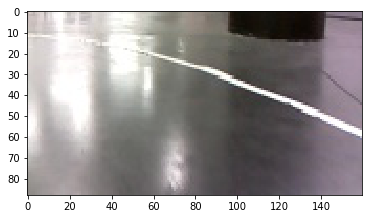

In [5]:
images.shape, plt.imshow(images[180])

In [6]:
#convert labels to np.array
labels = np.array(labels)
#labels_val = np.array(labels_val)

In [7]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [8]:
labelsd

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [9]:
#convert to np.array again
labelsd = np.array(labelsd)

In [10]:
#check if OK
labels[1], labelsd[1]

(1, array([1, 0, 0], dtype=uint8))

In [11]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [17]:
K.clear_session()

img_in = Input(shape=(88, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(3, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 88, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 160, 1)        28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 160, 2)        20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 88, 160, 2)        38        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 88, 160, 4)        76        
_________________________________________________________________
flatten_1 (Flatten)          (None, 56320)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1126420   
__________

In [19]:
h = model.fit(images, labelsd, validation_split=0.1, batch_size=32, epochs=20, verbose=1)

Train on 2625 samples, validate on 292 samples
Epoch 1/20
2625/2625 [==============================] - 29s - loss: 0.9130 - acc: 0.5733 - val_loss: 0.2976 - val_acc: 0.9589
Epoch 2/20
2625/2625 [==============================] - 26s - loss: 0.6471 - acc: 0.7261 - val_loss: 3.5195 - val_acc: 0.0753
Epoch 3/20
2625/2625 [==============================] - 28s - loss: 0.4869 - acc: 0.8019 - val_loss: 5.1199 - val_acc: 0.0240
Epoch 4/20
2625/2625 [==============================] - 26s - loss: 0.4111 - acc: 0.8335 - val_loss: 4.5789 - val_acc: 0.0548
Epoch 5/20
2625/2625 [==============================] - 25s - loss: 0.3462 - acc: 0.8636 - val_loss: 5.7294 - val_acc: 0.0205
Epoch 6/20
2625/2625 [==============================] - 26s - loss: 0.2863 - acc: 0.8956 - val_loss: 7.0039 - val_acc: 0.0342
Epoch 7/20
2625/2625 [==============================] - 26s - loss: 0.2466 - acc: 0.9029 - val_loss: 6.5348 - val_acc: 0.0856
Epoch 8/20
2625/2625 [==============================] - 26s - loss: 0.2

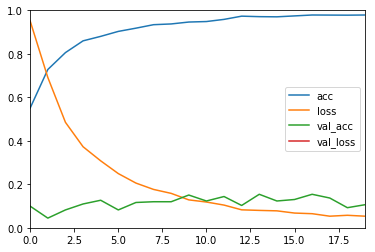

In [15]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [27]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx = np.argmax(all_preds, axis=1)

i = 0
for value in idx:
    idx[i] = value
    i = i + 1

idx, labels_val

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [24]:
import math
i = 0
res = 0
for value in idx:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.11194029850746269

In [25]:
model.save('model-BigDataset-simpler.h5')